In [1]:
import datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

## 1. read and take a peek at the original data

In [2]:
df = pd.read_csv('./house-pricing-beijing.utf8.csv', encoding = 'utf-8', dtype={'id':str})
df.shape

/usr/local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3044: DtypeWarning: Columns (11,12,14) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(318851, 26)

In [3]:
df.head()

,url,id,Lng,Lat,Cid,tradeTime,DOM,followers,totalPrice,price,...,buildingType,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage
0,https://bj.lianjia.com/chengjiao/101084782030....,101084782030,116.475489,40.019520,1111027376244,2016-08-09,1464.0,106,415.0,31680,...,1.0,2005,3,6,0.217,1.0,0.0,1.0,7,56021.0
1,https://bj.lianjia.com/chengjiao/101086012217....,101086012217,116.453917,39.881534,1111027381879,2016-07-28,903.0,126,575.0,43436,...,1.0,2004,4,6,0.667,1.0,1.0,0.0,7,71539.0
2,https://bj.lianjia.com/chengjiao/101086041636....,101086041636,116.561978,39.877145,1111040862969,2016-12-11,1271.0,48,1030.0,52021,...,4.0,2005,3,6,0.500,1.0,0.0,0.0,7,48160.0
3,https://bj.lianjia.com/chengjiao/101086406841....,101086406841,116.438010,40.076114,1111043185817,2016-09-30,965.0,138,297.5,22202,...,1.0,2008,1,6,0.273,1.0,0.0,0.0,6,51238.0
4,https://bj.lianjia.com/chengjiao/101086920653....,101086920653,116.428392,39.886229,1111027381174,2016-08-28,927.0,286,392.0,48396,...,4.0,1960,2,2,0.333,0.0,1.0,1.0,1,62588.0


In [4]:
df.columns

Index(['url', 'id', 'Lng', 'Lat', 'Cid', 'tradeTime', 'DOM', 'followers',
       'totalPrice', 'price', 'square', 'livingRoom', 'drawingRoom', 'kitchen',
       'bathRoom', 'floor', 'buildingType', 'constructionTime',
       'renovationCondition', 'buildingStructure', 'ladderRatio', 'elevator',
       'fiveYearsProperty', 'subway', 'district', 'communityAverage'],
      dtype='object')

## 2. clean and transform data

### check the mixed type columns

In [5]:
df.iloc[:, 11].unique()

array([2, 3, 1, 4, 5, 6, 9, 0, 7, 8, '1', '4', '3', '2', '5', '7', '9',
       '6', '0', '#NAME?', '8'], dtype=object)

In [6]:
# check how many rows is effected by col11 == '#NAME?'
df[df.iloc[:, 11] == '#NAME?'].shape

(32, 26)

In [7]:
# as the number is small, I choose to abandon these rows
df = df[df.iloc[:, 11] != '#NAME?']

In [8]:
df.iloc[:, 12].unique()

array([1, 2, 0, 4, 3, 5, '0', '1', '2', '3', '4', '5'], dtype=object)

In [9]:
df.iloc[:, 14].unique()

array([1, 2, 3, 0, 4, 5, 6, 7, '1', '2', '0', '3', '4', '5', '7'],
      dtype=object)

In [10]:
df.iloc[:, [11, 12, 14]].dtypes

livingRoom     object
drawingRoom    object
bathRoom       object
dtype: object

In [11]:
# after cleaning col11,
# col12 and col 14 becomes cleaned as well. So change the dtypes
df.iloc[:, [11, 12, 14]] = df.iloc[:, [11, 12, 14]].apply(pd.to_numeric)
df.iloc[:, [11, 12, 14]].dtypes

livingRoom     int64
drawingRoom    int64
bathRoom       int64
dtype: object

### get dummies

In [12]:
df = pd.get_dummies(df, columns=['buildingType', 'renovationCondition', 'buildingStructure'])
df.columns

Index(['url', 'id', 'Lng', 'Lat', 'Cid', 'tradeTime', 'DOM', 'followers',
       'totalPrice', 'price', 'square', 'livingRoom', 'drawingRoom', 'kitchen',
       'bathRoom', 'floor', 'constructionTime', 'ladderRatio', 'elevator',
       'fiveYearsProperty', 'subway', 'district', 'communityAverage',
       'buildingType_1.0', 'buildingType_2.0', 'buildingType_3.0',
       'buildingType_4.0', 'renovationCondition_1', 'renovationCondition_2',
       'renovationCondition_3', 'renovationCondition_4', 'buildingStructure_1',
       'buildingStructure_2', 'buildingStructure_3', 'buildingStructure_4',
       'buildingStructure_5', 'buildingStructure_6'],
      dtype='object')

In [13]:
# change the column names
col_name_map = {
    'buildingType_1.0': 'buildingType_tower',
    'buildingType_2.0': 'buildingType_bungalow',
    'buildingType_3.0': 'buildingType_combination_of_plate_and_tower',
    'buildingType_4.0': 'buildingType_plate',
    'renovationCondition_1': 'renovationCondition_other',
    'renovationCondition_2': 'renovationCondition_rough',
    'renovationCondition_3': 'renovationCondition_simplicity', 
    'renovationCondition_4': 'renovationCondition_hardcover',
    'buildingStructure_1': 'buildingStructure_unknow',
    'buildingStructure_2': 'buildingStructure_mixed',
    'buildingStructure_3': 'buildingStructure_brick_and_wood',
    'buildingStructure_4': 'buildingStructure_brick_and_concrete',
    'buildingStructure_5': 'buildingStructure_steel',
    'buildingStructure_6': 'buildingStructure_steel_concrete_composite'
}
df.rename(columns=col_name_map, inplace=True)

#### floor

In [14]:
df['relative_floor'] = df['floor'].str.split().str[0]
df['total_floor'] = df['floor'].str.split().str[-1]
df.drop(columns=['floor'], inplace=True)
df['relative_floor'].unique()

array(['高', '中', '底', '低', '顶', '未知'], dtype=object)

In [15]:
df = pd.get_dummies(df, columns=['relative_floor'])
df.columns

Index(['url', 'id', 'Lng', 'Lat', 'Cid', 'tradeTime', 'DOM', 'followers',
       'totalPrice', 'price', 'square', 'livingRoom', 'drawingRoom', 'kitchen',
       'bathRoom', 'constructionTime', 'ladderRatio', 'elevator',
       'fiveYearsProperty', 'subway', 'district', 'communityAverage',
       'buildingType_tower', 'buildingType_bungalow',
       'buildingType_combination_of_plate_and_tower', 'buildingType_plate',
       'renovationCondition_other', 'renovationCondition_rough',
       'renovationCondition_simplicity', 'renovationCondition_hardcover',
       'buildingStructure_unknow', 'buildingStructure_mixed',
       'buildingStructure_brick_and_wood',
       'buildingStructure_brick_and_concrete', 'buildingStructure_steel',
       'buildingStructure_steel_concrete_composite', 'total_floor',
       'relative_floor_中', 'relative_floor_低', 'relative_floor_底',
       'relative_floor_未知', 'relative_floor_顶', 'relative_floor_高'],
      dtype='object')

In [16]:
# change the column names
col_name_map = {
    'relative_floor_底': 'relative_floor_bottom',
    'relative_floor_低': 'relative_floor_low',
    'relative_floor_中': 'relative_floor_mid',
    'relative_floor_高': 'relative_floor_high',
    'relative_floor_顶': 'relative_floor_top',
    'relative_floor_未知': 'relative_floor_unknown'
}
df.rename(columns=col_name_map, inplace=True)

In [17]:
df.dtypes

url                                             object
id                                              object
Lng                                            float64
Lat                                            float64
Cid                                              int64
tradeTime                                       object
DOM                                            float64
followers                                        int64
totalPrice                                     float64
price                                            int64
square                                         float64
livingRoom                                       int64
drawingRoom                                      int64
kitchen                                          int64
bathRoom                                         int64
constructionTime                                object
ladderRatio                                    float64
elevator                                       float64
fiveYearsP

In [18]:
df['total_floor'] = pd.to_numeric(df['total_floor'])

### drop unnecessary columns

In [19]:
df.head()

,url,id,Lng,Lat,Cid,tradeTime,DOM,followers,totalPrice,price,...,buildingStructure_brick_and_concrete,buildingStructure_steel,buildingStructure_steel_concrete_composite,total_floor,relative_floor_mid,relative_floor_low,relative_floor_bottom,relative_floor_unknown,relative_floor_top,relative_floor_high
0,https://bj.lianjia.com/chengjiao/101084782030....,101084782030,116.475489,40.019520,1111027376244,2016-08-09,1464.0,106,415.0,31680,...,0,0,1,26,0,0,0,0,0,1
1,https://bj.lianjia.com/chengjiao/101086012217....,101086012217,116.453917,39.881534,1111027381879,2016-07-28,903.0,126,575.0,43436,...,0,0,1,22,0,0,0,0,0,1
2,https://bj.lianjia.com/chengjiao/101086041636....,101086041636,116.561978,39.877145,1111040862969,2016-12-11,1271.0,48,1030.0,52021,...,0,0,1,4,1,0,0,0,0,0
3,https://bj.lianjia.com/chengjiao/101086406841....,101086406841,116.438010,40.076114,1111043185817,2016-09-30,965.0,138,297.5,22202,...,0,0,1,21,0,0,1,0,0,0
4,https://bj.lianjia.com/chengjiao/101086920653....,101086920653,116.428392,39.886229,1111027381174,2016-08-28,927.0,286,392.0,48396,...,0,0,0,6,1,0,0,0,0,0


In [20]:
df.iloc[0, :]

url                                            https://bj.lianjia.com/chengjiao/101084782030....
id                                                                                  101084782030
Lng                                                                                      116.475
Lat                                                                                      40.0195
Cid                                                                                1111027376244
tradeTime                                                                             2016-08-09
DOM                                                                                         1464
followers                                                                                    106
totalPrice                                                                                   415
price                                                                                      31680
square                        

In [21]:
df.drop(columns=['url', 'id'], inplace=True)
df.iloc[0, :]

Lng                                                  116.475
Lat                                                  40.0195
Cid                                            1111027376244
tradeTime                                         2016-08-09
DOM                                                     1464
followers                                                106
totalPrice                                               415
price                                                  31680
square                                                   131
livingRoom                                                 2
drawingRoom                                                1
kitchen                                                    1
bathRoom                                                   1
constructionTime                                        2005
ladderRatio                                            0.217
elevator                                                   1
fiveYearsProperty       

#### convert datetime type

In [22]:
df['tradeTime'].unique()

array(['2016-08-09', '2016-07-28', '2016-12-11', ..., '2012-01-28',
       '2011-01-30', '2009-01-11'], dtype=object)

In [23]:
try:
    df['tradeTime'] = pd.to_datetime(df['tradeTime'])
except ValueError:
    print(df['tradeTime'])

In [24]:
df.dtypes

Lng                                                   float64
Lat                                                   float64
Cid                                                     int64
tradeTime                                      datetime64[ns]
DOM                                                   float64
followers                                               int64
totalPrice                                            float64
price                                                   int64
square                                                float64
livingRoom                                              int64
drawingRoom                                             int64
kitchen                                                 int64
bathRoom                                                int64
constructionTime                                       object
ladderRatio                                           float64
elevator                                              float64
fiveYear

In [25]:
df['constructionTime'].unique()

array(['2005', '2004', '2008', '1960', '1997', '2009', '2006', '1991',
       '2001', '1990', '2011', '2000', '1998', '2010', '1996', '1993',
       '2002', '未知', '2012', '1989', '2003', '2007', '1994', '1984',
       '1992', '2014', '1985', '2013', '1999', '1979', '1981', '1976',
       '1982', '1975', '1983', '1986', '1995', '1965', '1988', '1987',
       '2015', '1955', '1980', '1978', '1958', '1970', '1956', '1977',
       '1964', '1963', '1967', '2016', '1974', '1973', '1959', '1954',
       '1962', '1966', '1957', '1944', '1972', '1971', '1953', '1968',
       '1961', '1950', '1952', '1933', '1969', '1906', '1934', '1914'],
      dtype=object)

In [26]:
len(df[df['constructionTime'] == '未知'])

19283

- As the number of sample with unknown construction time is not small, I decided not to simply drop this column.
- I will create a new column to indicate whether construction time is unknown, and convert the '未知' values to 0

In [27]:
df['construction_time_unknown'] = 0
df.loc[df['constructionTime'] == '未知', 'construction_time_unknown'] = 1
df

,Lng,Lat,Cid,tradeTime,DOM,followers,totalPrice,price,square,livingRoom,...,buildingStructure_steel,buildingStructure_steel_concrete_composite,total_floor,relative_floor_mid,relative_floor_low,relative_floor_bottom,relative_floor_unknown,relative_floor_top,relative_floor_high,construction_time_unknown
0,116.475489,40.019520,1111027376244,2016-08-09,1464.0,106,415.0,31680,131.00,2,...,0,1,26,0,0,0,0,0,1,0
1,116.453917,39.881534,1111027381879,2016-07-28,903.0,126,575.0,43436,132.38,2,...,0,1,22,0,0,0,0,0,1,0
2,116.561978,39.877145,1111040862969,2016-12-11,1271.0,48,1030.0,52021,198.00,3,...,0,1,4,1,0,0,0,0,0,0
3,116.438010,40.076114,1111043185817,2016-09-30,965.0,138,297.5,22202,134.00,3,...,0,1,21,0,0,1,0,0,0,0
4,116.428392,39.886229,1111027381174,2016-08-28,927.0,286,392.0,48396,81.00,2,...,0,0,6,1,0,0,0,0,0,0
5,116.466280,39.991363,1111027377512,2016-07-22,861.0,57,275.6,52000,53.00,1,...,0,1,8,1,0,0,0,0,0,0
6,116.482586,39.891991,1111027380683,2016-07-14,851.0,167,275.0,37672,73.00,2,...,0,0,6,0,0,0,0,0,1,0
7,116.453917,39.881534,1111027381879,2016-09-07,904.0,138,800.0,49521,161.55,3,...,0,1,22,0,0,0,0,0,1,0
8,116.555729,40.162058,1111027379605,2016-09-04,873.0,218,134.0,27917,48.00,1,...,0,0,10,0,0,0,0,0,1,0
9,116.453086,39.898397,1111027374519,2016-09-05,865.0,134,380.0,55883,68.00,1,...,0,1,23,1,0,0,0,0,0,0


In [28]:
df['constructionTime'].replace(to_replace='未知', value='0', inplace=True)
df['constructionTime'].unique()

array(['2005', '2004', '2008', '1960', '1997', '2009', '2006', '1991',
       '2001', '1990', '2011', '2000', '1998', '2010', '1996', '1993',
       '2002', '0', '2012', '1989', '2003', '2007', '1994', '1984',
       '1992', '2014', '1985', '2013', '1999', '1979', '1981', '1976',
       '1982', '1975', '1983', '1986', '1995', '1965', '1988', '1987',
       '2015', '1955', '1980', '1978', '1958', '1970', '1956', '1977',
       '1964', '1963', '1967', '2016', '1974', '1973', '1959', '1954',
       '1962', '1966', '1957', '1944', '1972', '1971', '1953', '1968',
       '1961', '1950', '1952', '1933', '1969', '1906', '1934', '1914'],
      dtype=object)

In [29]:
df['constructionTime'] = pd.to_numeric(df['constructionTime'])
df['constructionTime'].unique()

array([2005, 2004, 2008, 1960, 1997, 2009, 2006, 1991, 2001, 1990, 2011,
       2000, 1998, 2010, 1996, 1993, 2002,    0, 2012, 1989, 2003, 2007,
       1994, 1984, 1992, 2014, 1985, 2013, 1999, 1979, 1981, 1976, 1982,
       1975, 1983, 1986, 1995, 1965, 1988, 1987, 2015, 1955, 1980, 1978,
       1958, 1970, 1956, 1977, 1964, 1963, 1967, 2016, 1974, 1973, 1959,
       1954, 1962, 1966, 1957, 1944, 1972, 1971, 1953, 1968, 1961, 1950,
       1952, 1933, 1969, 1906, 1934, 1914])

In [30]:
# check if there's still non numeric columns
df[~df.applymap(np.isreal).all(1)]

,Lng,Lat,Cid,tradeTime,DOM,followers,totalPrice,price,square,livingRoom,...,buildingStructure_steel,buildingStructure_steel_concrete_composite,total_floor,relative_floor_mid,relative_floor_low,relative_floor_bottom,relative_floor_unknown,relative_floor_top,relative_floor_high,construction_time_unknown


### process nan values

In [31]:
df.isnull().sum().sum()

158433

In [32]:
np.where(pd.isnull(df))

(array([  2027,   3902,   4982, ..., 318811, 318815, 318817]),
 array([19, 19, 19, ...,  4,  4,  4]))

In [33]:
df.iloc[:, 19]

0          56021.0
1          71539.0
2          48160.0
3          51238.0
4          62588.0
5          67738.0
6          50112.0
7          71539.0
8          44235.0
9          78590.0
10         57260.0
11         44235.0
12         46867.0
13        123002.0
14         53588.0
15         59395.0
16         53730.0
17         70141.0
18         48859.0
19         70141.0
20        101192.0
21         34966.0
22         95392.0
23         82311.0
24         84981.0
25         50916.0
26         59797.0
27         70141.0
28        109848.0
29         67509.0
            ...   
318821     58612.0
318822     33518.0
318823     36774.0
318824     45617.0
318825     28609.0
318826     38959.0
318827     54435.0
318828     54282.0
318829     46927.0
318830     54918.0
318831     54842.0
318832     54282.0
318833     54282.0
318834     42943.0
318835     35675.0
318836     28609.0
318837     45617.0
318838     38959.0
318839     54282.0
318840     35675.0
318841     42943.0
318842     2

In [34]:
df.iloc[:, 19].isna().sum()

463

In [35]:
# The na values of this column is not much, but the meaning of this column is not specified in the readme.
# As the meaning is not clear, I decided to drop this column.
df.drop(columns=['communityAverage'], inplace=True)
print(df.isnull().sum().sum())
np.where(pd.isnull(df))

157970


(array([ 36640,  50437,  92932, ..., 318811, 318815, 318817]),
 array([4, 4, 4, ..., 4, 4, 4]))

In [36]:
df.columns

Index(['Lng', 'Lat', 'Cid', 'tradeTime', 'DOM', 'followers', 'totalPrice',
       'price', 'square', 'livingRoom', 'drawingRoom', 'kitchen', 'bathRoom',
       'constructionTime', 'ladderRatio', 'elevator', 'fiveYearsProperty',
       'subway', 'district', 'buildingType_tower', 'buildingType_bungalow',
       'buildingType_combination_of_plate_and_tower', 'buildingType_plate',
       'renovationCondition_other', 'renovationCondition_rough',
       'renovationCondition_simplicity', 'renovationCondition_hardcover',
       'buildingStructure_unknow', 'buildingStructure_mixed',
       'buildingStructure_brick_and_wood',
       'buildingStructure_brick_and_concrete', 'buildingStructure_steel',
       'buildingStructure_steel_concrete_composite', 'total_floor',
       'relative_floor_mid', 'relative_floor_low', 'relative_floor_bottom',
       'relative_floor_unknown', 'relative_floor_top', 'relative_floor_high',
       'construction_time_unknown'],
      dtype='object')

In [37]:
df['DOM'].unique()

array([1.464e+03, 9.030e+02, 1.271e+03, 9.650e+02, 9.270e+02, 8.610e+02,
       8.510e+02, 9.040e+02, 8.730e+02, 8.650e+02, 8.270e+02, 7.730e+02,
       7.930e+02, 7.840e+02, 7.060e+02, 8.000e+02, 7.390e+02, 7.900e+02,
       6.910e+02, 7.470e+02, 6.900e+02, 6.970e+02, 6.810e+02, 7.890e+02,
       6.560e+02, 6.220e+02, 5.980e+02, 7.150e+02, 6.300e+02, 5.800e+02,
       6.400e+02, 5.940e+02, 5.400e+02, 6.280e+02, 6.030e+02, 6.210e+02,
       5.350e+02, 5.730e+02, 5.690e+02, 5.070e+02, 5.460e+02, 5.160e+02,
       5.240e+02, 5.330e+02, 5.440e+02, 5.390e+02, 5.300e+02, 5.200e+02,
       4.940e+02, 5.260e+02, 4.670e+02, 5.030e+02, 5.230e+02, 5.080e+02,
       6.180e+02, 7.210e+02, 4.700e+02, 6.590e+02, 4.510e+02, 4.980e+02,
       4.590e+02, 5.110e+02, 4.740e+02, 4.420e+02, 4.380e+02, 4.660e+02,
       4.690e+02, 4.810e+02, 4.560e+02, 4.820e+02, 5.130e+02, 4.770e+02,
       4.440e+02, 5.060e+02, 4.720e+02, 4.540e+02, 4.210e+02, 4.570e+02,
       4.300e+02, 5.090e+02, 4.430e+02, 5.450e+02, 

- seems that 'DOM' column has a lot of nan values.

- as the normal DOM(Days On Market) should always be positive, I decided to fill the nan values -1.

- this may introduce incorrect information as an 'unknown DOM' should not be 'smaller' than a normal DOM

In [38]:
df['DOM'].fillna(-1, inplace=True)
df.isnull().sum().sum()

0

### create features from datetime

- As datetime is not a good format for a feature, I need to transform it into some numeric fields.
- The 'time' part of a datetime should not be very important for house pricing, so it can be transformed into year, month, day and week day.
- I will try visualization it first.

In [39]:
def get_year(my_datetime):
    return my_datetime.year

In [40]:
def get_month(my_datetime):
    return my_datetime.month

In [41]:
def get_day(my_datetime):
    return my_datetime.day

In [42]:
def get_weekday(my_datetime):
    return my_datetime.weekday()

In [43]:
df['year'] = df['tradeTime'].apply(get_year)
df['month'] = df['tradeTime'].apply(get_month)
df['day'] = df['tradeTime'].apply(get_day)
df['weekday'] = df['tradeTime'].apply(get_weekday)
df[['tradeTime', 'year', 'month', 'day', 'weekday', 'price']].head()

,tradeTime,year,month,day,weekday,price
0,2016-08-09,2016,8,9,1,31680
1,2016-07-28,2016,7,28,3,43436
2,2016-12-11,2016,12,11,6,52021
3,2016-09-30,2016,9,30,4,22202
4,2016-08-28,2016,8,28,6,48396


#### check relation between year and price

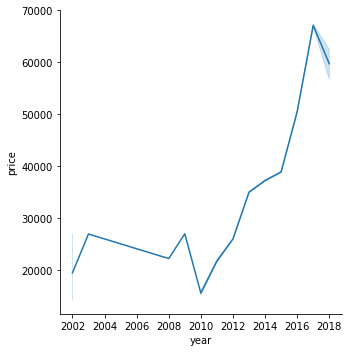

In [44]:
# plotting with 95% confidence interval
sns.relplot(x="year", y="price", kind="line", data=df)

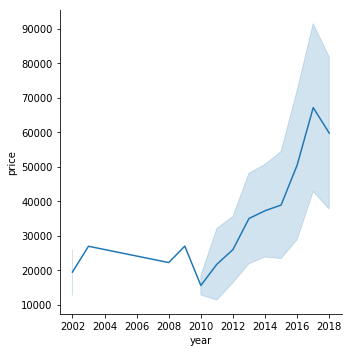

In [45]:
# plotting with standard deviation
sns.relplot(x="year", y="price", kind="line", ci="sd", data=df);

#### check relation between month and price

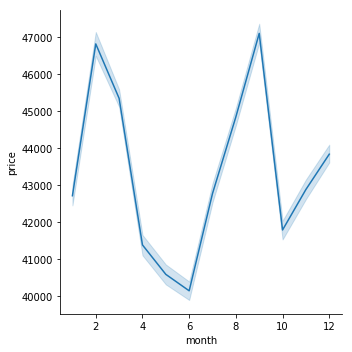

In [46]:
# plotting with 95% confidence interval
sns.relplot(x="month", y="price", kind="line", data=df)

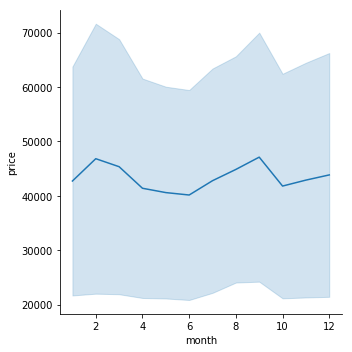

In [47]:
# plotting with standard deviation
sns.relplot(x="month", y="price", kind="line", ci="sd", data=df);

#### check relation between day and price

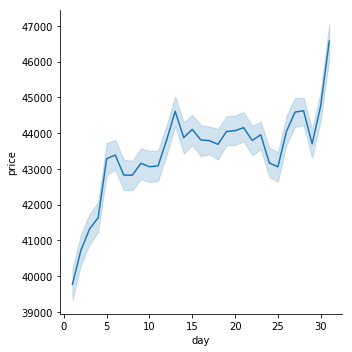

In [48]:
# plotting with 95% confidence interval
sns.relplot(x="day", y="price", kind="line", data=df)

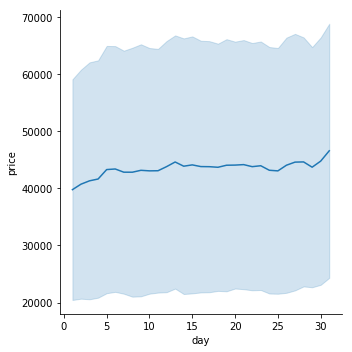

In [49]:
# plotting with standard deviation
sns.relplot(x="day", y="price", kind="line", ci="sd", data=df);

#### check relation between week day and price

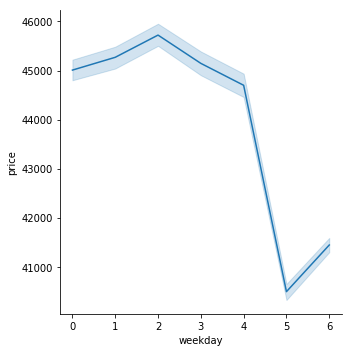

In [50]:
# plotting with 95% confidence interval
sns.relplot(x="weekday", y="price", kind="line", data=df)

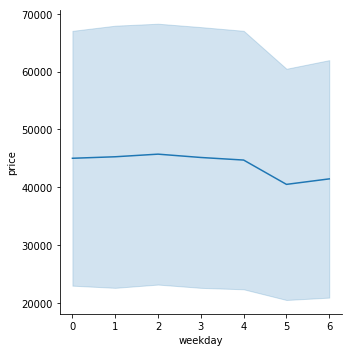

In [51]:
# plotting with standard deviation
sns.relplot(x="weekday", y="price", kind="line", ci="sd", data=df);

### conclusion

- It seems that the month, day and week day does not affect much on the total price.
- This conclusion comes from the observation that the mean does not vary much, but the standard deviation is huge.
- But as I decided to try xgboost to do some regression, I can keep the year, month, day and week day as new features.

In [52]:
df.drop(columns=['tradeTime'], inplace=True, errors='ignore')

#### some other process

In [53]:
df['subway'].unique()

array([1., 0.])

In [54]:
df['subway'] = df['subway'].astype('uint8')

- As price(price per square meter) * square == totalPrice
- And I focus on predict the price not the totalPrice, so drop total price here

In [55]:
df.drop(columns=['totalPrice'], inplace=True)

### maybe save for later use

In [56]:
df.to_csv('./house-pricing-beijing.utf8.pre-processed.csv', index=False)

### Try xgb

In [59]:
import xgboost as xgb
from sklearn.model_selection import train_test_split

#### split X and y, train data and test data.

In [60]:
X = df.drop(columns=['price'])
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [61]:
model = xgb.XGBRegressor(
    objective='reg:squarederror',
    colsample_bytree=0.4,
    gamma=0,
    learning_rate=0.07,
    max_depth=3,
    min_child_weight=1.5,
    n_estimators=10000,
    reg_alpha=0.75,
    reg_lambda=0.45,
    subsample=0.6,
    seed=42)

In [ ]:
model.fit(X_train, y_train)

OrderedDict(sorted(model.booster().get_fscore().items(), key=lambda t: t[1], reverse=True))

/usr/local/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[11:59:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
data = pandas.DataFrame(np.arange(12).reshape((4,3)), columns=['a', 'b', 'c'])
label = pandas.DataFrame(np.random.randint(2, size=4))
dtrain = xgb.DMatrix(data, label=label)

In [ ]:
param = {'max_depth': 2, 'eta': 1, 'objective': 'binary:logistic'}
param['nthread'] = 4
param['eval_metric'] = 'auc'

In [ ]:
num_round = 10
bst = xgb.train(param, dtrain, num_round, evallist)


In [ ]:
data = np.random.rand(7, 10)
dtest = xgb.DMatrix(data)
ypred = bst.predict(dtest)